<a href="https://colab.research.google.com/github/fabiolamariana/Python/blob/master/np1_eb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise das notas da P1 de EB - 2019/1

####  profa. Dra. Fabíola Ribeiro

Nesse relatório analisamos a distribuição das notas de alunos do ciclo básico de Engenharia na disciplina Eletricidade Básica (EB). A nota final da prova é composta de 0 a 2 pontos de atividade e 0 a 8 pontos da prova em si. Na prova foram abordados os seguintes conteúdos: Lei de Ohm, força elétrica e campo elétrico.

In [0]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [0]:
file="https://raw.githubusercontent.com/fabiolamariana/Python/master/EB_notas_P1_.csv"
np1 = pd.read_csv(file, delimiter=',')

In [0]:
#np1.head()

## Presença na prova

In [19]:
# quantidade de alunos que compareceram
a=np1.NP1.str.contains('').sum()   #total de alunos na lista
b=np1.NP1.str.contains('NC').sum() #total de alunos que não compareceram
print("alunos presentes:", a-b)
print("alunos ausentes:", b)
print("presença:", round((a-b)/(a)*100,1), "%")

alunos presentes: 74
alunos ausentes: 12
presença: 86.0 %


In [0]:
# limpando os NC
np1['NP1']=np1.NP1.str.replace('NC','NaN').astype(float)
np1_c = np1.dropna(subset=['NP1'], how='any')
#np1_c contém as notas sem NC

## Média e desvio padrão geral

In [21]:
#calculando médias
media=np1_c.NP1.mean()
desvpad=np1_c.NP1.std()
desvpad_av=desvpad/(a-b)**(1./2)
print('média geral:', round(media,2))
print('desvio padrão:', round(desvpad,2))
print('desvio padrão da média:', round(desvpad_av,2))


média geral: 5.7
desvio padrão: 2.36
desvio padrão da média: 0.27


## Média e desvio padrão por turma

In [22]:
# médias por turma
np1_c.groupby("Turma").NP1.mean()

Turma
EB2P01    4.886364
EB3P01    6.181818
EB3Q01    5.933333
Name: NP1, dtype: float64

In [23]:
#desvio padrão por turma
np1_c.groupby("Turma").NP1.std()

Turma
EB2P01    1.573076
EB3P01    2.461830
EB3Q01    2.654642
Name: NP1, dtype: float64

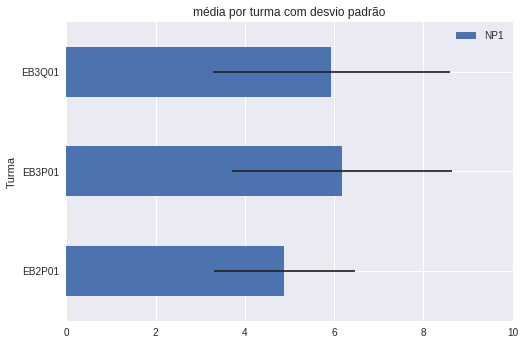

In [24]:
#gráfico média por turma com desvio padrão
np1_c.groupby('Turma').mean().plot(kind='barh', xlim=(0,10), title="média por turma com desvio padrão", xerr=np1_c.groupby("Turma").NP1.std())

## Distribuição de notas

Nos gráficos a seguir são apresentados histogramas com a distribuição das notas. O primeiro histograma contém todas as notas, os seguintes são divididos por turma.

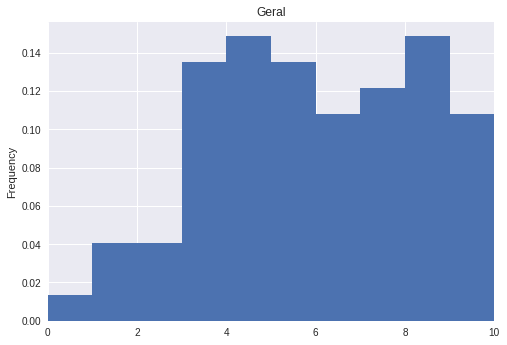

In [25]:
#histograma

np1_c['NP1'].plot(kind='hist', title="Geral", xlim=(0,10), bins=[0,1,2,3,4,5,6,7,8,9,10], density=1)


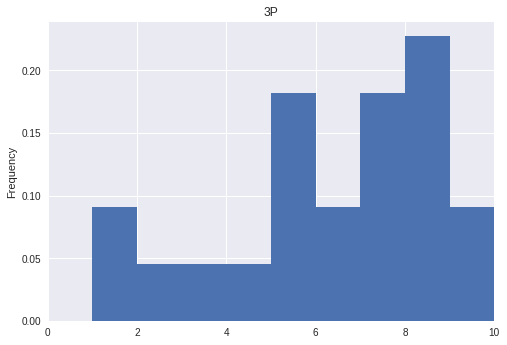

In [26]:
np1_c[np1_c.Turma=="EB3P01"]['NP1'].plot(kind='hist', title="3P",xlim=(0,10), bins=[0,1,2,3,4,5,6,7,8,9,10], density=1)

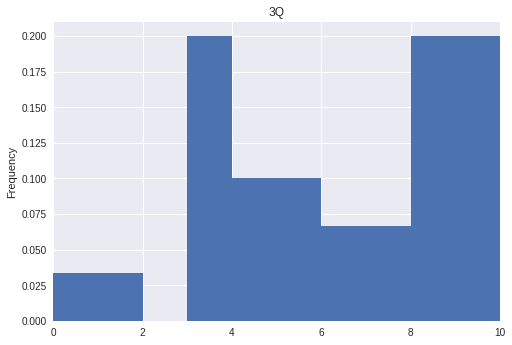

In [27]:
np1_c[np1_c.Turma=="EB3Q01"]['NP1'].plot(kind='hist', title="3Q",xlim=(0,10),bins=[0,1,2,3,4,5,6,7,8,9,10], density=1)

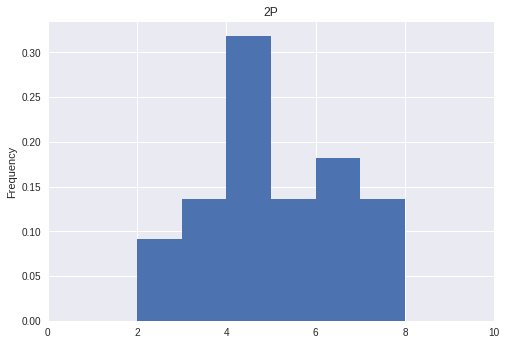

In [28]:
np1_c[np1_c.Turma=="EB2P01"]['NP1'].plot(kind='hist', title="2P",xlim=(0,10),bins=[0,1,2,3,4,5,6,7,8,9,10], density=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00469b5e80>,
      dtype=object)

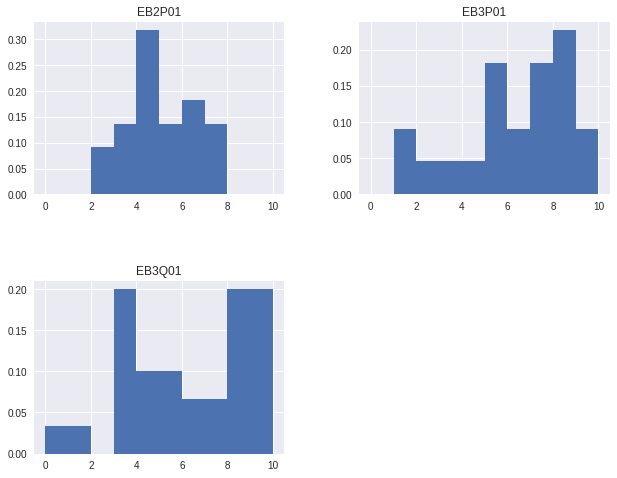

In [29]:
np1_c.hist(column='NP1', by="Turma", figsize=(10,8), bins=[0,1,2,3,4,5,6,7,8,9,10], xrot=1, density=1)